# Debopam Das

## Task:- Exploratory Data Analysis on SampleSuperstore, find out the weak areas where you can work to make more profit.

### collecting necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

### The Data is about transaction of products of an Chain of Super Store in the United States

### my strategy is to do univariate or bi-variate analysis on the columns

In [2]:
raw_data=pd.read_csv(r'C:\Users\DEBOPAM DAS\Desktop\New folder\GRIP_may_21\SampleSuperstore.csv')

In [3]:
raw_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
raw_data.shape

(9994, 13)

In [5]:
raw_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
raw_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

##### since Country is a constant it could be removed

In [7]:
raw_data.drop(['Country'],axis=1,inplace=True)

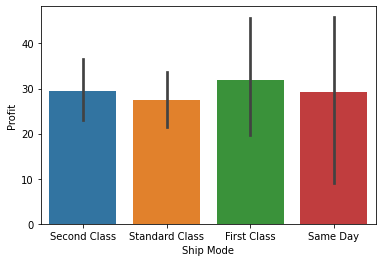

In [8]:
sns.barplot(x='Ship Mode',y='Profit',data=raw_data)

### here we can see that among 915 transactions in NYC 868 have yielded a profit, we can apply this to every city or by a little cange in the code, see the losses.


In [9]:
a=raw_data['City']
b=raw_data['Profit']>0
c=a[b]
c.value_counts()

New York City     868
Los Angeles       705
San Francisco     482
Seattle           406
Philadelphia      283
                 ... 
Springdale          1
Jefferson City      1
Rogers              1
Mason               1
Norfolk             1
Name: City, Length: 513, dtype: int64

In [10]:
a=(raw_data['City']=='New York City')
a.value_counts()

False    9079
True      915
Name: City, dtype: int64

### here I wanted to check the region column, it's a country based variable

In [11]:
raw_data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [12]:
a=raw_data["State"]
b=(raw_data['Region']=='Central')
c=a[b]
c.value_counts()

Texas           985
Illinois        492
Michigan        255
Indiana         149
Wisconsin       110
Minnesota        89
Missouri         66
Oklahoma         66
Nebraska         38
Iowa             30
Kansas           24
South Dakota     12
North Dakota      7
Name: State, dtype: int64

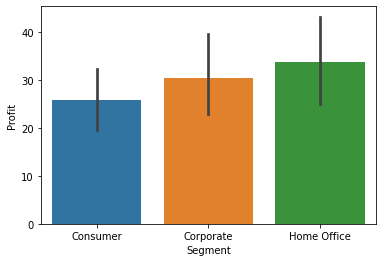

In [13]:
sns.barplot(raw_data['Segment'],raw_data['Profit'])
plt.show()

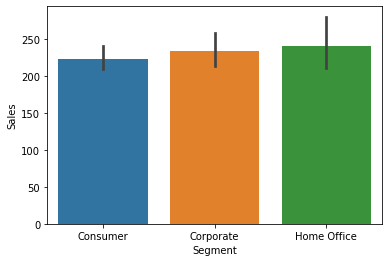

In [14]:
sns.barplot(raw_data['Segment'],raw_data['Sales'])
plt.show()

In [15]:
raw_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


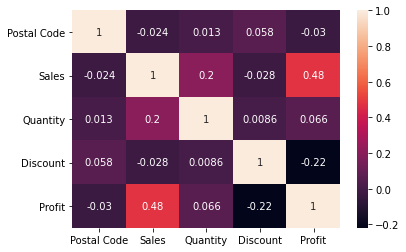

In [16]:
X=raw_data.corr()
sns.heatmap(X,annot=True)

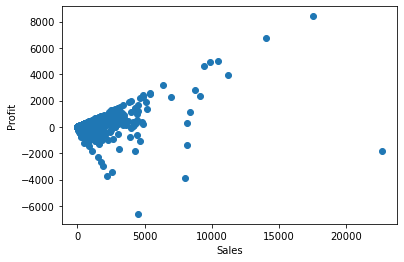

In [17]:
plt.scatter(x='Sales',y='Profit',data=raw_data)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

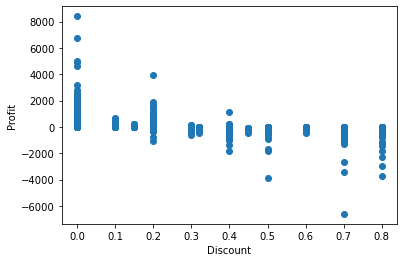

In [18]:
plt.scatter(x='Discount',y='Profit',data=raw_data)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

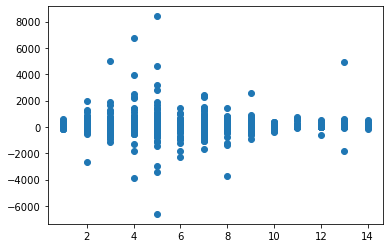

In [19]:
plt.scatter(x='Quantity',y='Profit',data=raw_data)
plt.show()

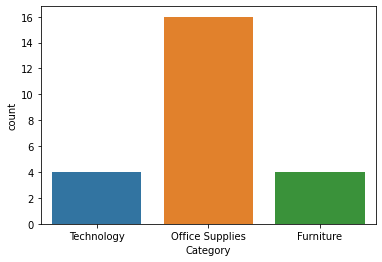

In [20]:
y=(raw_data['Quantity']==13)
x=raw_data['Category']
z=x[y]
a=(raw_data['Profit']>=0)
sns.countplot(z[a])

### If 5 items are bought then based on category profit count will be

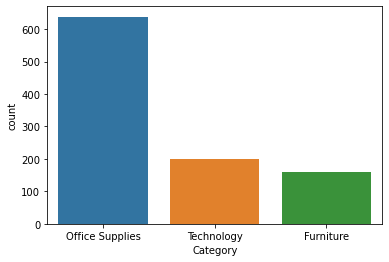

In [21]:
y=(raw_data['Quantity']==5)
x=raw_data['Category']
z=x[y]
a=(raw_data['Profit']>=0)
sns.countplot(z[a])

### If 5 items are bought then based on category profit count will be

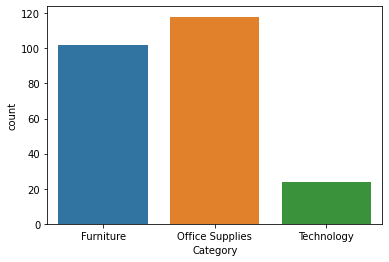

In [22]:
y=(raw_data['Quantity']==5)
x=raw_data['Category']
z=x[y]
a=(raw_data['Profit']<=0)
sns.countplot(z[a])

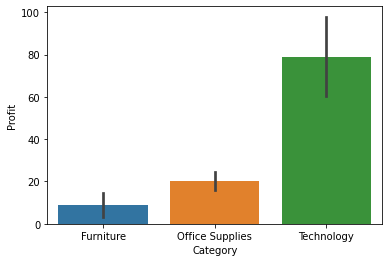

In [23]:
sns.barplot(raw_data['Category'],raw_data['Profit'])
plt.show()

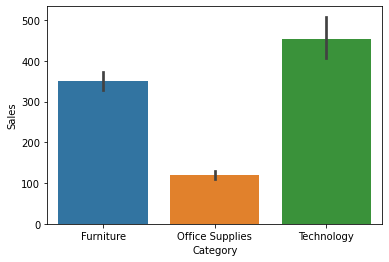

In [24]:
sns.barplot(raw_data['Category'],raw_data['Sales'])
plt.show()

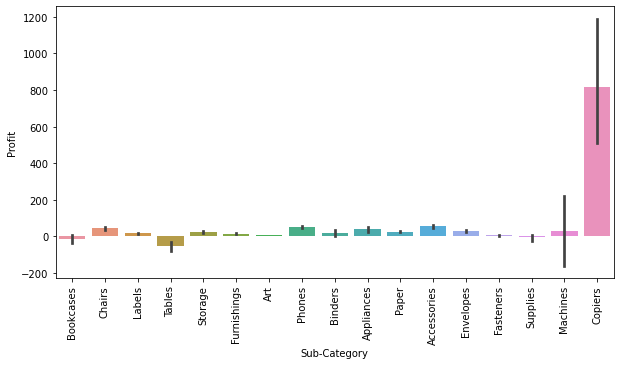

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(raw_data['Sub-Category'],raw_data['Profit'])
plt.xticks(rotation=90)
plt.show()

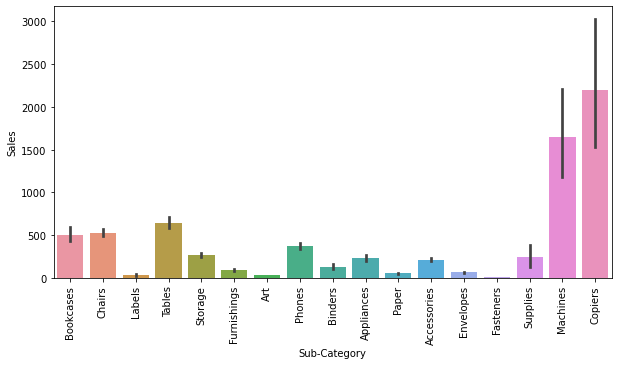

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(raw_data['Sub-Category'],raw_data['Sales'])
plt.xticks(rotation=90)
plt.show()

# Among all other information i have 3 key points which i believe deserves focus

## 1) Discount should not be more than 0.3
## 2) Furniture Sector is suffering losses
## 3) Tables,book cases and supplies are suffering losses 